# Dimension Reduction: tests

### Load data

In [2]:
import sys, glob
import numpy as np
import pandas as pd
from tqdm import tqdm
sys.path.append('..')
from utils import *

/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#To use new data format by hour (time_basis = 24 in plot_cluster)
file_path = '../../QuickStart/Data/Electricity/residential_all_hour_with_date_time.pkl'
x_date_time = pd.read_pickle(file_path)
ids = x_date_time.columns.values
df = x_date_time.sort_values(by='date_time')["2009-07-15" : "2010-12-31"]
x = np.array(df).T

In [3]:
#To use old data format by 30min (time_basis = 48 in plot_cluster)
file_path = '../../QuickStart/Data/Electricity/residential_all.pkl'
df = pd.read_pickle(file_path)
val = df['consumption'].values
ids = df['ID'].values
val_reshape = []
for i in tqdm(range(3639)):
    val_reshape.append(val[i*25728: (i+1)*25728])
x = np.array(val_reshape)

100%|██████████| 3639/3639 [00:00<00:00, 1508954.25it/s]


### No Dimension Reduction


In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=14, random_state=0).fit(x)

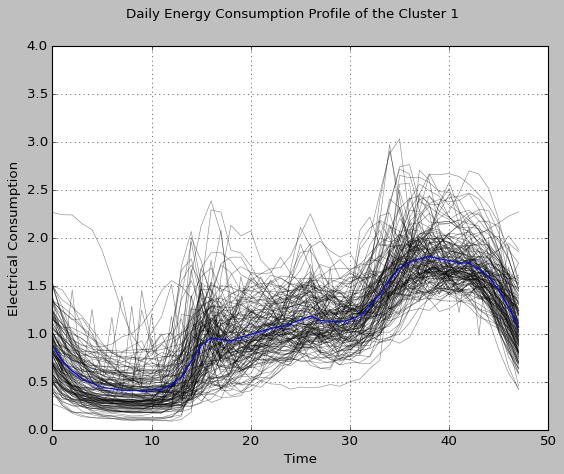

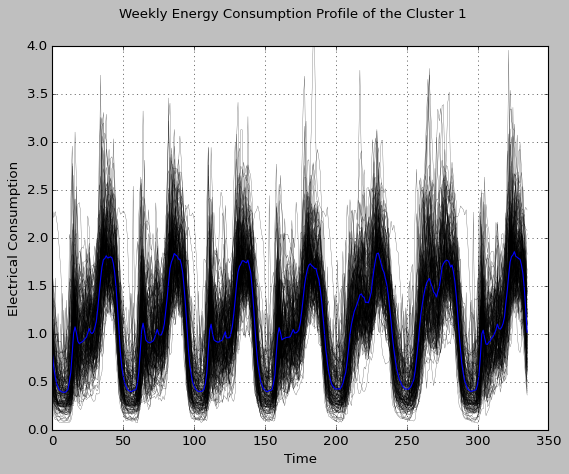

In [79]:
plot_cluster(x, kmeans.predict(x), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans.predict(x), cluster_id=0, period='week', time_basis = 48)

In [80]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1).fit_transform(x)

/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


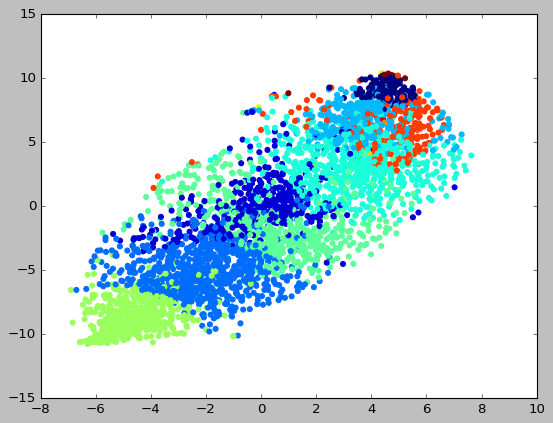

In [81]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.predict(x), edgecolors = "face")

### Principal Component Analysis (PCA)

Text(0, 0.5, '1 - Explained Variance Ratio')

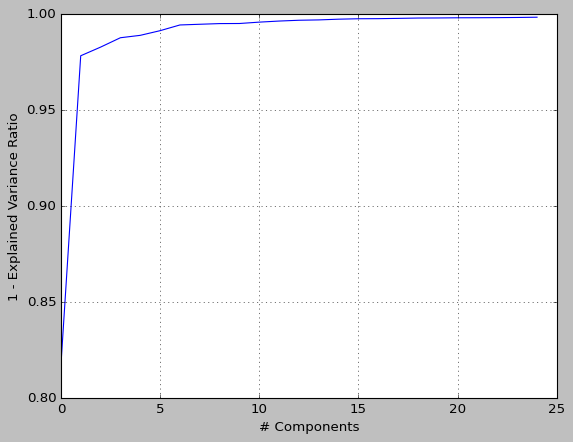

In [82]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)

pca.fit(x)
plt.plot(1-pca.explained_variance_ratio_[:25])
plt.grid()

plt.xlabel('# Components')
plt.ylabel('1 - Explained Variance Ratio')

In [20]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)

In [21]:
kmeans_pca = KMeans(n_clusters=14, random_state=0).fit(x_pca)

In [23]:
kmeans_pca.predict(x_pca)

array([ 6, 12,  0, ..., 13,  3,  6], dtype=int32)

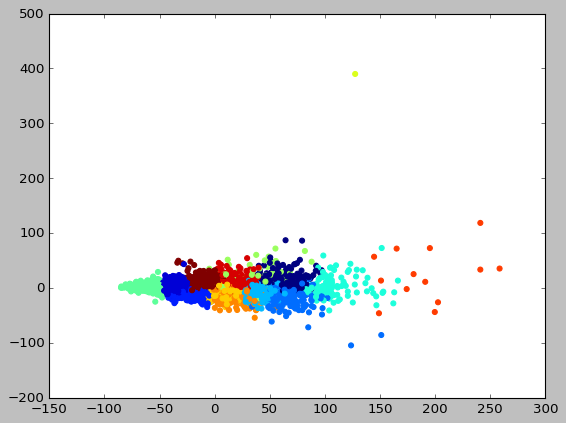

In [24]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_pca.predict(x_pca), edgecolors = "face")

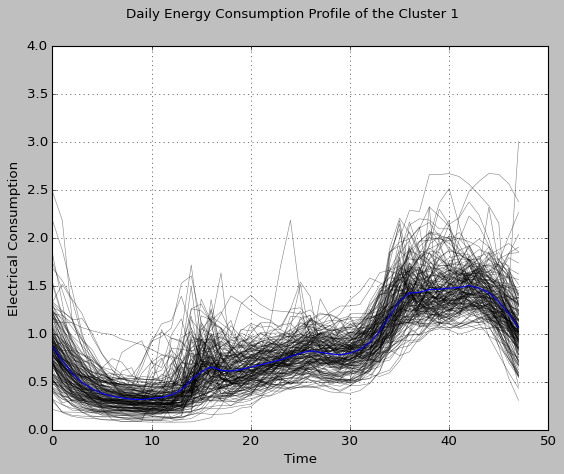

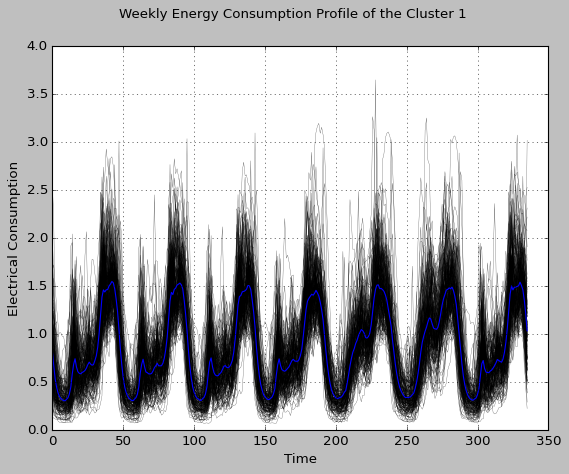

In [25]:
plot_cluster(x, kmeans_pca.predict(x_pca), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_pca.predict(x_pca), cluster_id=0, period='week', time_basis = 48)

### Multidimensional Scaling (MDS)

In [23]:
import matplotlib.pyplot as plt 
from sklearn.manifold import MDS

mds = MDS(n_components=14, n_jobs=-1, verbose=2)
x_mds = mds.fit_transform(x)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


it: 0, stress 137316690964.55728
it: 0, stress 137313477123.16144
it: 0, stress 137309205984.4263
it: 0, stress 137302566425.29651
it: 1, stress 6291211347.676435
it: 1, stress 6198097825.50379
it: 1, stress 6328929988.6128025
it: 1, stress 6196763114.030715
it: 2, stress 3537430816.780175
it: 2, stress 3539902455.5617547
it: 2, stress 3532089100.9424486
it: 3, stress 3022215931.1582036
it: 2, stress 3532238742.970089
it: 3, stress 3028011345.571917
it: 4, stress 2890744103.341336
it: 3, stress 3024242505.8474545
it: 4, stress 2897326375.3506703
it: 3, stress 3023792920.3571033
it: 5, stress 2846147257.6957645
it: 5, stress 2853974655.2168074
it: 4, stress 2894610873.3592644
it: 6, stress 2827217905.2278624
it: 4, stress 2895301184.530466
it: 6, stress 2836306507.901338
it: 7, stress 2817406309.0827827
it: 5, stress 2851222604.5420194
it: 7, stress 2827762461.380826
it: 5, stress 2852229182.761164
it: 8, stress 2822936524.691679
it: 8, stress 2811223253.7923474
it: 6, stress 2833292086

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.7min finished


In [43]:
from sklearn.cluster import KMeans

kmeans_mds = KMeans(n_clusters=14, random_state=0).fit(x_mds)

In [44]:
kmeans_mds.predict(x_mds)

array([7, 6, 0, ..., 2, 5, 7], dtype=int32)

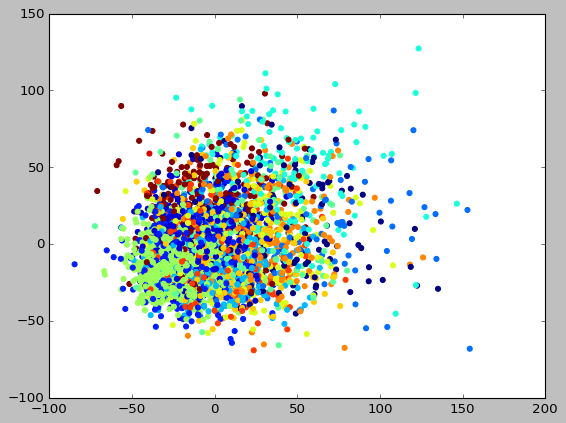

In [45]:
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=kmeans_mds.predict(x_mds), edgecolors = "face")

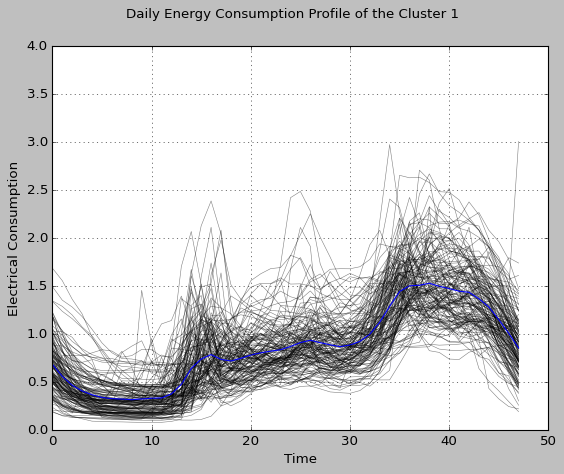

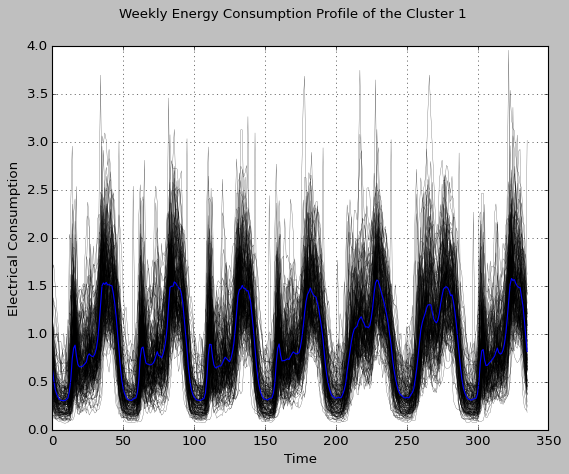

In [48]:
plot_cluster(x, kmeans_mds.predict(x_mds), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_mds.predict(x_mds), cluster_id=0, period='week', time_basis = 48)

### Fast Fourier Transform

In [110]:
from scipy.fft import fft

x_fft = np.abs(fft(x, n=100))

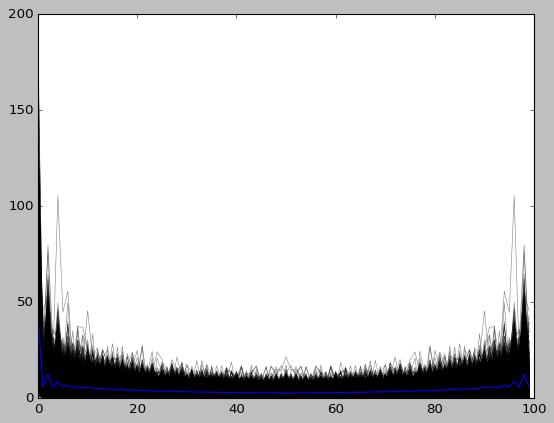

In [111]:
fig = plt.figure()
plt.plot(np.transpose(x_fft), c='black', linewidth=0.5, alpha=0.5)
plt.plot(x_fft.mean(0))

plt.show()

In [112]:
kmeans_fft = KMeans(n_clusters=14, random_state=0).fit(x_fft)

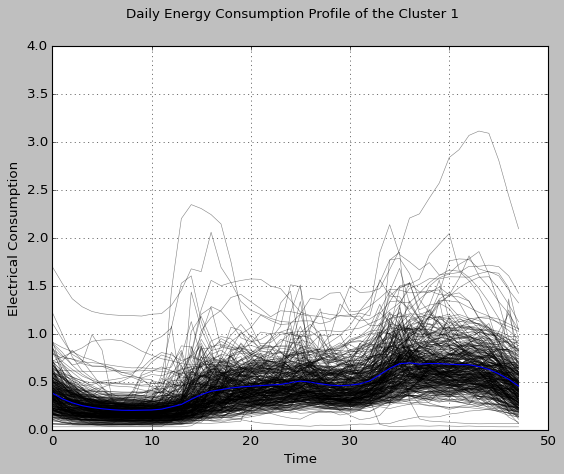

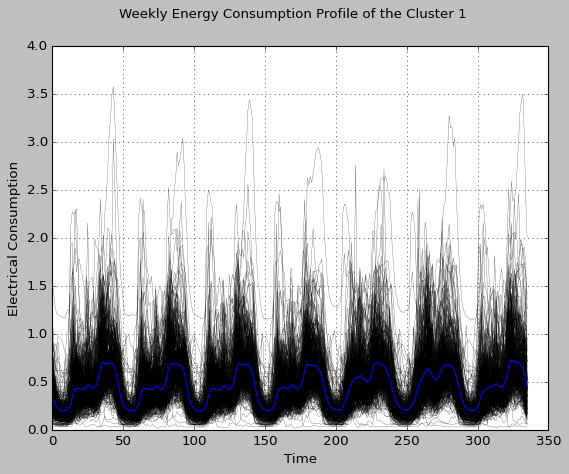

In [115]:
plot_cluster(x, kmeans_fft.predict(x_fft), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_fft.predict(x_fft), cluster_id=0, period='week', time_basis = 48)

### Wavelet Transform

In [50]:
from scipy import signal

dwt = []
time_basis = 48

for i in tqdm(range(len(x))):
    sig = x[:, :7*time_basis*(x.shape[-1]//(time_basis*7))].reshape(x.shape[0], -1, 7, time_basis).mean(1)[i].flatten()
    widths = np.arange(1, 25)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)[:, ::2]
    dwt.append(cwtmatr)
dwt = np.asarray(dwt)

100%|██████████| 3639/3639 [02:24<00:00, 25.26it/s]


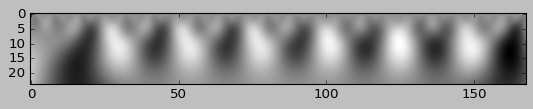

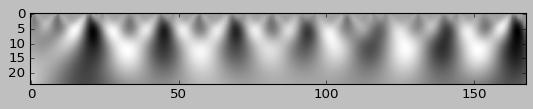

In [52]:
fig = plt.figure()

plt.imshow(dwt.mean(0), cmap='binary')

fig = plt.figure()

plt.imshow(dwt[np.random.randint(0, len(x))], cmap='binary')

x_dwt = dwt.reshape(len(dwt), -1)

In [53]:
kmeans_dwt = KMeans(n_clusters=14, random_state=0).fit(x_dwt)

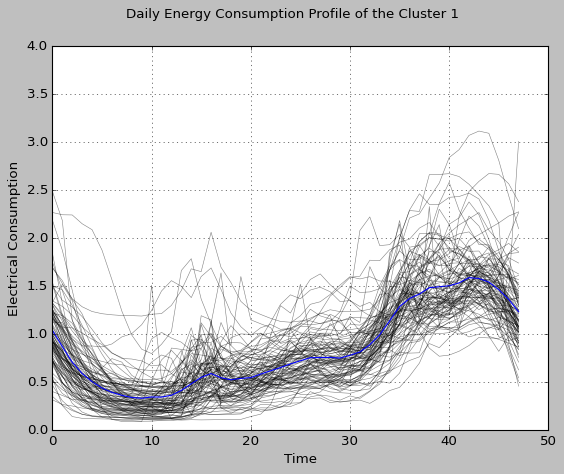

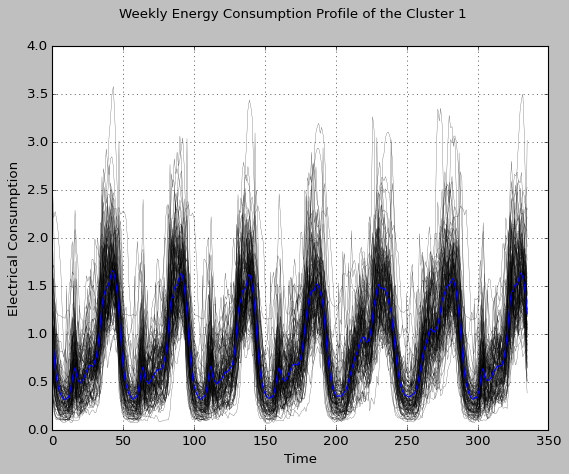

In [54]:
plot_cluster(x, kmeans_dwt.predict(x_dwt), cluster_id=0, period='day', time_basis = 48)
plot_cluster(x, kmeans_dwt.predict(x_dwt), cluster_id=0, period='week', time_basis = 48)

### Piecewise Constant Approximation

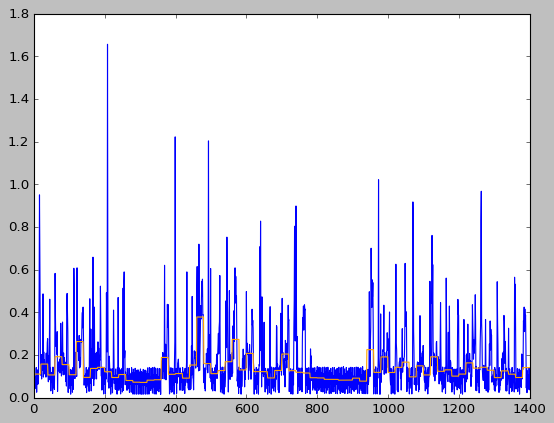

In [58]:
def piecewise_approx(sig, window=20, overlapping=True):
    sig_apca = []
    for t in range(len(sig)//window):
        for w in range(window):
            #sig_apca.append(sig[t*window:(t+1)*window].mean())
            sig_apca.append(np.median(sig[t*window:(t+1)*window]))
    return np.asarray(sig_apca)

sig = x[0]
sig_apca = piecewise_approx(sig)

import matplotlib.pyplot as plt 

plt.plot(sig[100:1500])
plt.plot(sig_apca[100:1500], "orange")